[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oscar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oscar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Counter({'computer': 1055, 'technology': 390, 'internet': 299, 'robots': 285, 'software': 122, 'electronics': 80, 'digital': 79, 'tech': 61})


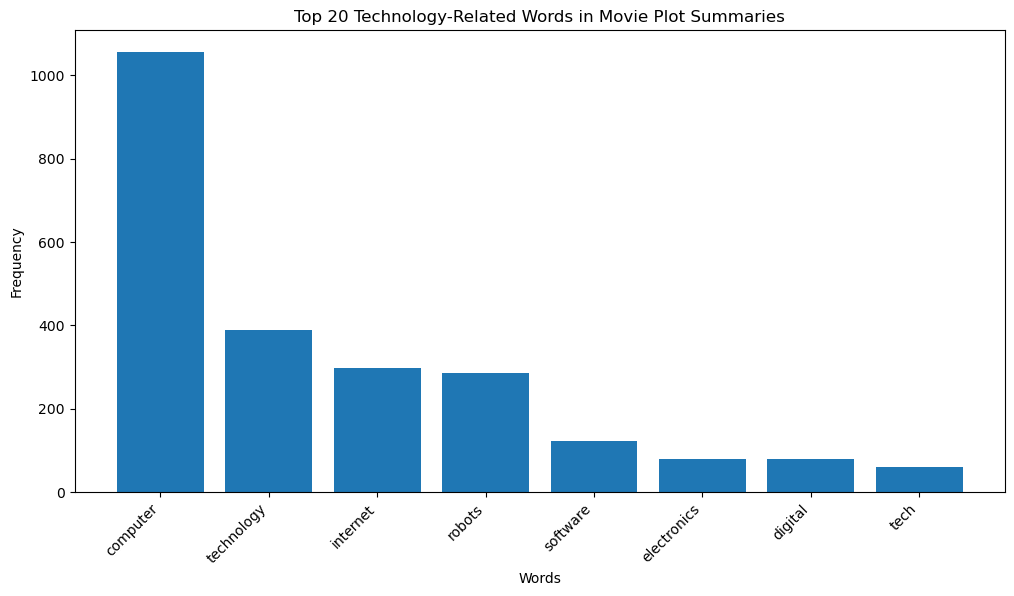

In [2]:
# Language processing cell
import nltk # Natural language processing libraries
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import spacy
import pandas as pd
import os
import gzip
import tarfile
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from collections import Counter
pathv = "MovieSummaries/"
# Read the plot summaries from the text file
with open(pathv + 'plot_summaries.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Extract movie IDs and plot summaries
movie_ids = []
plot_summaries = []

for line in lines:
    parts = line.split('\t')
    if len(parts) == 2:
        movie_id, summary = parts
        movie_ids.append(movie_id)
        plot_summaries.append(summary)

# Tokenization and Stopword Removal
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

# Define a list of technology-related keywords 
technology_keywords = ["technology", "robots", "tech", "computer", "internet", "software", "digital", "electronics"]

# Tokenize and preprocess the plot summaries
tokenized_summaries = []
for summary in plot_summaries:
    tokens = word_tokenize(summary)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    tokenized_summaries.extend(tokens)

# Count the occurrence of technology-related keywords
technology_word_counts = Counter(word for word in tokenized_summaries if word in technology_keywords)
print(technology_word_counts)
# Get the 20 most common technology-related words
top_technology_words = technology_word_counts.most_common(20)

# Plot the occurrence of the top technology-related words
words, counts = zip(*top_technology_words)
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.title('Top 20 Technology-Related Words in Movie Plot Summaries')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


# Named Entity Recognition 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oscar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oscar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


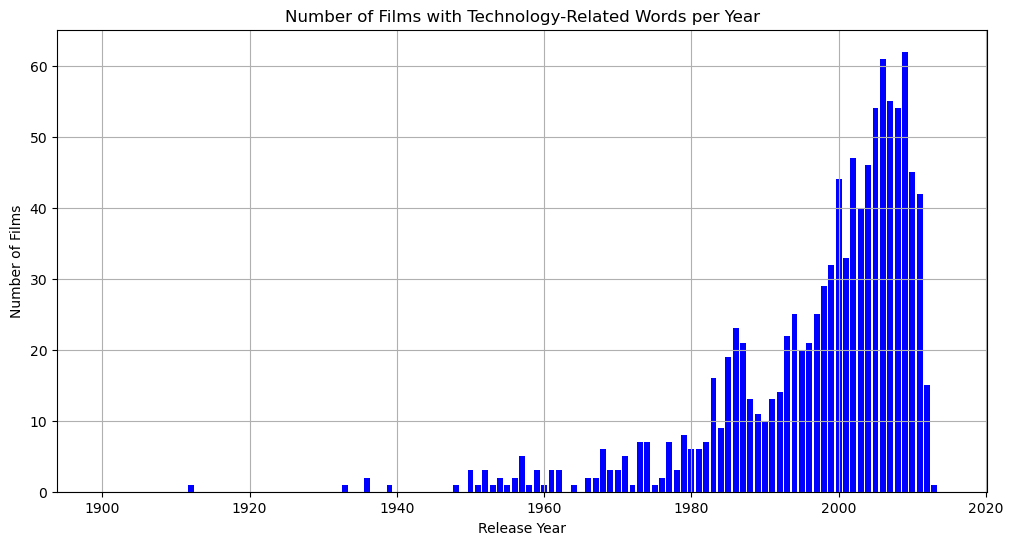

In [64]:
from collections import Counter
import matplotlib.pyplot as plt

# Read the movie dataframe (assuming it's in CSV format)
#movies_df = pd.read_csv(pathv + 'movie.metadata.tsv')  # Replace with the actual file path
names = ['wikipedia_movie_id','freebase_movie_id', 'movie_name', 'movie_release_date', 'movie_box_office_revenue', 'movie_runtime', 'movie_languages', 'movie_countries', 'movie_genres']
movies_df = pd.read_csv(pathv + 'movie.metadata.tsv', names = names, sep = '\t', )
movies_df[['movie_name', 'movie_languages', 'movie_countries', 'movie_genres']]= movies_df[['movie_name', 'movie_languages', 'movie_countries', 'movie_genres']].applymap(lambda x: str.lower(x))
# Create a dictionary to map movie IDs to release years
def extract_year(date):
    if isinstance(date, str):
        match = re.search(r'(\d{4})', date)
        if match:
            return int(match.group(0))
    return None

movies_df['movie_release_date'] = movies_df['movie_release_date'].apply(extract_year)
movies_df['movie_release_date'] = movies_df['movie_release_date'].fillna(0).astype(int)
# Read the plot summaries from the text file
with open(pathv + 'plot_summaries.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Extract movie IDs and plot summaries
movie_ids = []
plot_summaries = []

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

for line in lines:
    parts = line.split('\t')
    if len(parts) == 2:
        movie_id, summary = parts
        movie_ids.append(int(movie_id))
        plot_summaries.append(summary)

# Define a list of technology-related keywords 
technology_keywords = ["computer", "technology", "technologies","internet"]

# Create a dictionary to store film years based on movie IDs
film_years = {}
for index, row in movies_df.iterrows():
    film_years[row['wikipedia_movie_id']] = row['movie_release_date']
    
# Initialize a dictionary to store the film counts per year

film_counts_by_year = {year: 0 for year in range(1900, 2015)}

# Tokenize and preprocess the plot summaries
tokenized_summaries = []
for summary in plot_summaries:
    tokens = word_tokenize(summary)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    tokenized_summaries.extend(tokens)

# Count the occurrence of technology-related keywords
technology_word_counts = Counter(word for word in tokenized_summaries if word in technology_keywords)
variable = 0
# Determine which films contain technology-related words
for movie_id in movie_ids:
    if movie_id in film_years:
        variable += 1
        year = int(film_years[movie_id])
        if year in film_counts_by_year:
            summary = plot_summaries[movie_ids.index(movie_id)]
            if any(keyword in summary for keyword in technology_keywords):
                film_counts_by_year[year] += 1


# Create a list of years and corresponding film counts
years = list(film_counts_by_year.keys())
film_counts = list(film_counts_by_year.values())

# Plot the number of films containing technology-related words per year
plt.figure(figsize=(12, 6))
plt.bar(years, film_counts, color='b')
plt.title('Number of Films with Technology-Related Words per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Films')
plt.grid(True)
plt.show()


In [56]:
if 23890098 in film_years:
    key_type = type(23890098)
print(key_type)

<class 'int'>


In [41]:
# Sample plot summary
sample_summary = plot_summaries[0]
print("Sample Plot Summary:")
print(sample_summary)

# Print a few entries from the film_years dictionary
print("\nSample entries from film_years dictionary:")
for movie_id, year in list(film_years.items())[:5]:
    print(f"Movie ID: {movie_id}, Release Year: {year}")

# Check if any technology-related keywords are present in the plot summaries
tech_words_found = [word for word in technology_keywords if word in sample_summary.lower()]
print("\nTechnology-related words in the sample summary:")
print(tech_words_found)
print(technology_word_counts)
print(film_counts_by_year)


Sample Plot Summary:
Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.


Sample entries from film_years dictionary:
Movie ID: 975900, Release Year: 2001
Movie ID: 3196793, Release Year: 2000
Movie ID: 28463795, Release Year: 1988
Movie ID: 9363483, Release Year: 1987
Movie ID: 261236, Release Year: 1983

Technology-related words in the sample summary:
[]
Counter({'computer': 1055, 'technology': 390, 'internet': 299, 'software': 122, 'electronics': 80, 'digital': 79, 'tech': 61})
{1900: 0, 1901: 0, 1902: 0, 1903: 0, 1904: 0, 1905: 0, 1906: 0, 1907: 0, 1908: 0, 1909: 0, 1910: 0, 1911: 0, 1912: 0, 1913: 0, 1914: 0, 1915: 0, 1916: 0, 1917: 0, 1918: 0, 1919: 0, 1920: 0, 1921: 0, 1922: 0, 1923: 0, 1924: 0, 1925: 0, 1926: 0, 1927: 0, 1928: 0, 1929: 0, 1930: 0, 1931: 0, 1932: 0, 1933: 0, 1934: 0, 1935: 0, 1936: 0, 1937: 0, 1938: 0, 1939: 0, 1940: 0, 1941: 0, 1942: 0,

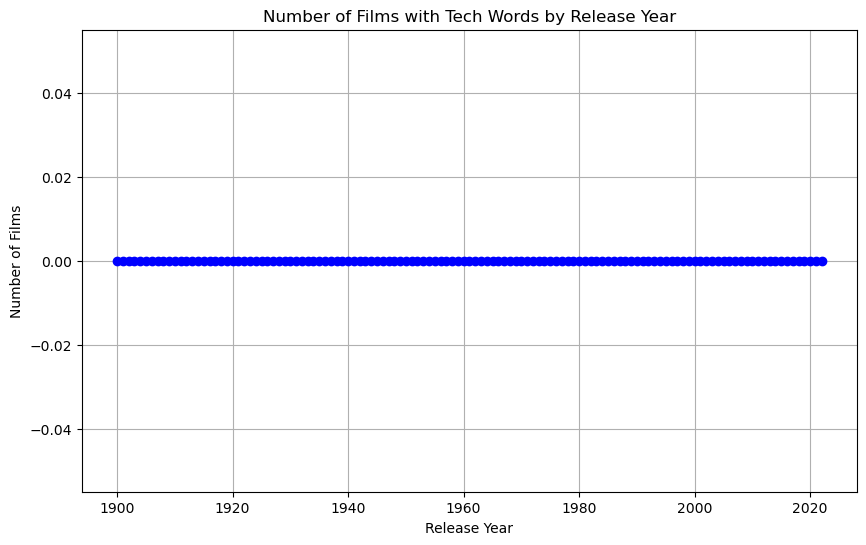

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load the movie dataframe (assuming you already have it loaded)
# df_movies = pd.read_csv('movies.csv')
names = ['wikipedia_movie_id','freebase_movie_id', 'movie_name', 'movie_release_date', 'movie_box_office_revenue', 'movie_runtime', 'movie_languages', 'movie_countries', 'movie_genres']
movies_df = pd.read_csv(pathv + 'movie.metadata.tsv', names = names, sep = '\t', )
movies_df[['movie_name', 'movie_languages', 'movie_countries', 'movie_genres']]= movies_df[['movie_name', 'movie_languages', 'movie_countries', 'movie_genres']].applymap(lambda x: str.lower(x))
# Read the plot summaries from the text file
with open(pathv + 'plot_summaries.txt', 'r', encoding='utf-8') as file:
    plot_summaries = file.readlines()

# Define a list of tech-related words
tech_words = ['technology', 'computer', 'software', 'digital', 'internet', 'machine', 'innovation', 'smartphone', 'algorithm', 'data']

# Create a dictionary to map movie IDs to release years
def extract_year(date):
    if isinstance(date, str):
        match = re.search(r'(\d{4})', date)
        if match:
            return int(match.group(0))
    return None

movies_df['movie_release_date'] = movies_df['movie_release_date'].apply(extract_year)
movies_df['movie_release_date'] = movies_df['movie_release_date'].fillna(0).astype(int)

# Initialize a dictionary to store counts by release year
tech_word_counts = {year: 0 for year in range(1900, 2023)}  # Assuming a range of years

# Process plot summaries to count tech-related words
for summary in plot_summaries:
    parts = summary.split()
    if len(parts) == 2:
        movie_id = int(parts[0])
        plot_summary = parts[1].lower()  # Convert to lowercase for case-insensitive matching
        release_year = movies_df[movies_df['wikipedia_movie_id'] == movie_id]['movie_release_date'].values[0]
        if release_year:
            tech_word_counts[release_year] += sum(1 for word in plot_summary.split() if word in tech_words)

# Convert the counts to a DataFrame for plotting
df_counts = pd.DataFrame(tech_word_counts.items(), columns=['movie_release_date', 'Tech Word Counts'])

# Create a plot of the number of films with tech words by release year
plt.figure(figsize=(10, 6))
plt.plot(df_counts['movie_release_date'], df_counts['Tech Word Counts'], marker='o', linestyle='-', color='b')
plt.title('Number of Films with Tech Words by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Films')
plt.grid()
plt.show()


In [32]:
print(movie_id)

6040782


In [40]:
import pandas as pd
import os
import gzip
import tarfile

  
# open fil
file = tarfile.open('MovieSummaries.tar.gz')
  
# print file names
print(file.getnames())
  
# extract files
file.extractall('./')
  
# close file
file.close()


pathv = "MovieSummaries/"
names = ['wikipedia_movie_id','freebase_movie_id', 'movie_name', 'movie_release_date', 'movie_box_office_revenue', 'movie_runtime', 'movie_languages', 'movie_countries', 'movie_genres']
movies_data = pd.read_csv(pathv + 'movie.metadata.tsv', names = names, sep = '\t', )
movies_data[['movie_name', 'movie_languages', 'movie_countries', 'movie_genres']]= movies_data[['movie_name', 'movie_languages', 'movie_countries', 'movie_genres']].applymap(lambda x: str.lower(x))
CharacterDF = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie release date', 'Character name', 'Actor date of birth', 'Actor gender', 'Actor height (in meters)', 'Actor ethnicity (Freebase ID)', 'Actor name', 'Actor age at movie release', 'Freebase character/actor map ID', 'Freebase character ID', 'Freebase actor ID']
characters_data = pd.read_csv(pathv + 'character.metadata.tsv', names = CharacterDF, sep = '\t', )
specific_movie_id = 23890098
if specific_movie_id in movies_df['wikipedia_movie_id'].values:
    print(f"Movie ID {specific_movie_id} is present in the DataFrame.")
else:
    print(f"Movie ID {specific_movie_id} is not present in the DataFrame.")




#film_per_actor = characters_data.groupby(by=['Actor name'])['Actor name'].count()
#film_per_actor.columns = ['Actor name', 'Number_films']
#film_per_actor.sort_values(by=[''],axis=0, ascending=False)
#film_per_actor.head(100)
#film_per_actor.loc['Brad Pitt']
#movies_data['movie_name'].eq('man with a movie camera').any()
#mean = film_per_actor.mean()
#print(mean)
#film_per_actor.head(5)
#movies_data.head(5)
#df_revenue = df.dropna(subset=['Movie box office revenue'], inplace=True)
#df_revenue = movies_data.dropna()
#print(len(df_revenue))

['MovieSummaries', 'MovieSummaries/tvtropes.clusters.txt', 'MovieSummaries/name.clusters.txt', 'MovieSummaries/plot_summaries.txt', 'MovieSummaries/README.txt', 'MovieSummaries/movie.metadata.tsv', 'MovieSummaries/character.metadata.tsv']
Movie ID 23890098 is present in the DataFrame.
